In [1]:
cd ..

/home/hyunjun/workspace/NH


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

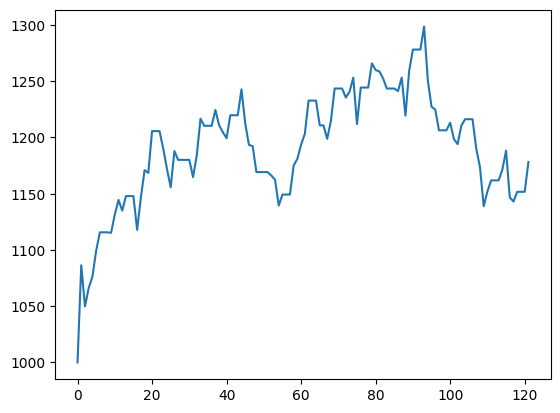

In [7]:
data = pd.read_csv('result/seed1/PV_RL.csv', index_col=0)
plt.plot(data.values)

In [10]:
kospi_ = pd.read_csv('data/data1/kospi.csv', index_col=0)['2015':'2024']
dates = kospi_.index
pv_path = lambda algo, seed: f'result/5cut/binning_O/seed{seed}/PV_{algo}.csv'

pv_rl = [pd.read_csv(pv_path('RL', seed), index_col=0) for seed in range(1, 6)]
pv_mean_rl = np.mean(np.concatenate(pv_rl, axis=-1), axis=-1)
pv_std_rl = np.std(np.concatenate(pv_rl, axis=-1), axis=-1)

In [11]:
def show_plot(seed='all'):
    linewidth = 4.0
    beta = 0.5
    timesteps = [8*i for i in range(14)]

    sns.set(style='white')
    plt.figure(figsize=(25, 6))
    plt.rc('legend', fontsize=20)
    plt.xticks(timesteps, dates[timesteps], weight='bold', fontsize=13.5)
    plt.yticks(weight='bold', fontsize=13.5)
    plt.ylabel('Porftolio Value', weight='bold', fontsize=20)

    if seed == 'all':
        plt.plot(pv_mean_rl, color="C4", linewidth=linewidth, label='Felector search')

        plt.fill_between(x=np.arange(pv_mean_rl.shape[0]), 
                        y1=pv_mean_rl + beta*pv_std_rl, 
                        y2=pv_mean_rl - beta*pv_std_rl, 
                        alpha=0.3, color="C4")
        
    else:
        plt.plot(pv_rl[seed-1], color="C4", linewidth=linewidth, label='Felector search')

    plt.title('Test Dataset Backtesting', weight='bold', fontsize=20)
    plt.legend()
    plt.show()

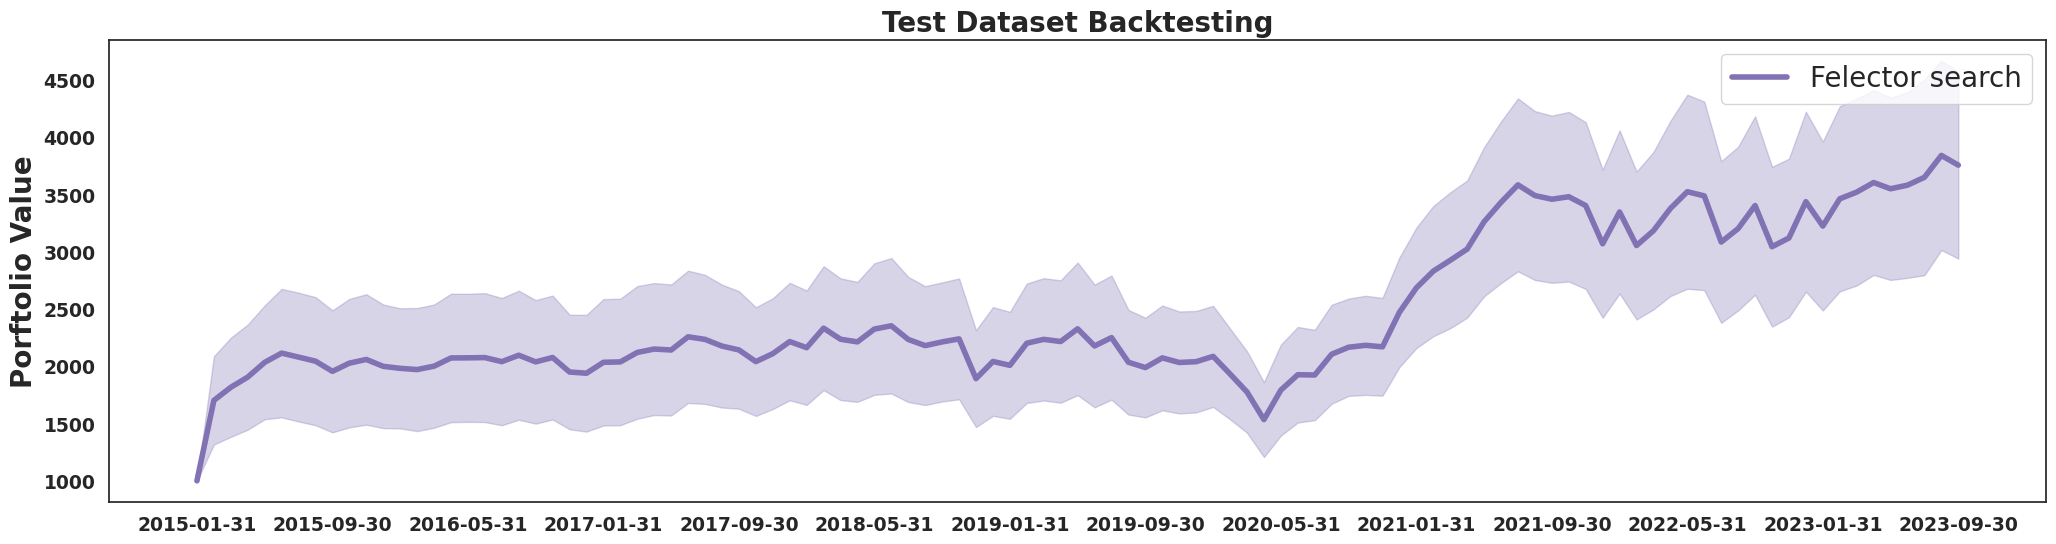

In [12]:
show_plot()